In [124]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [151]:
# Define the data for a simple histogram
x = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y = [21, 15, 40, 52, 64, 76, 22, 35, 15, 24, 19, 16, 37, 50, 18, 27, 43, 57, 70, 82]
data = pandas.DataFrame({"x": x, "y": y})

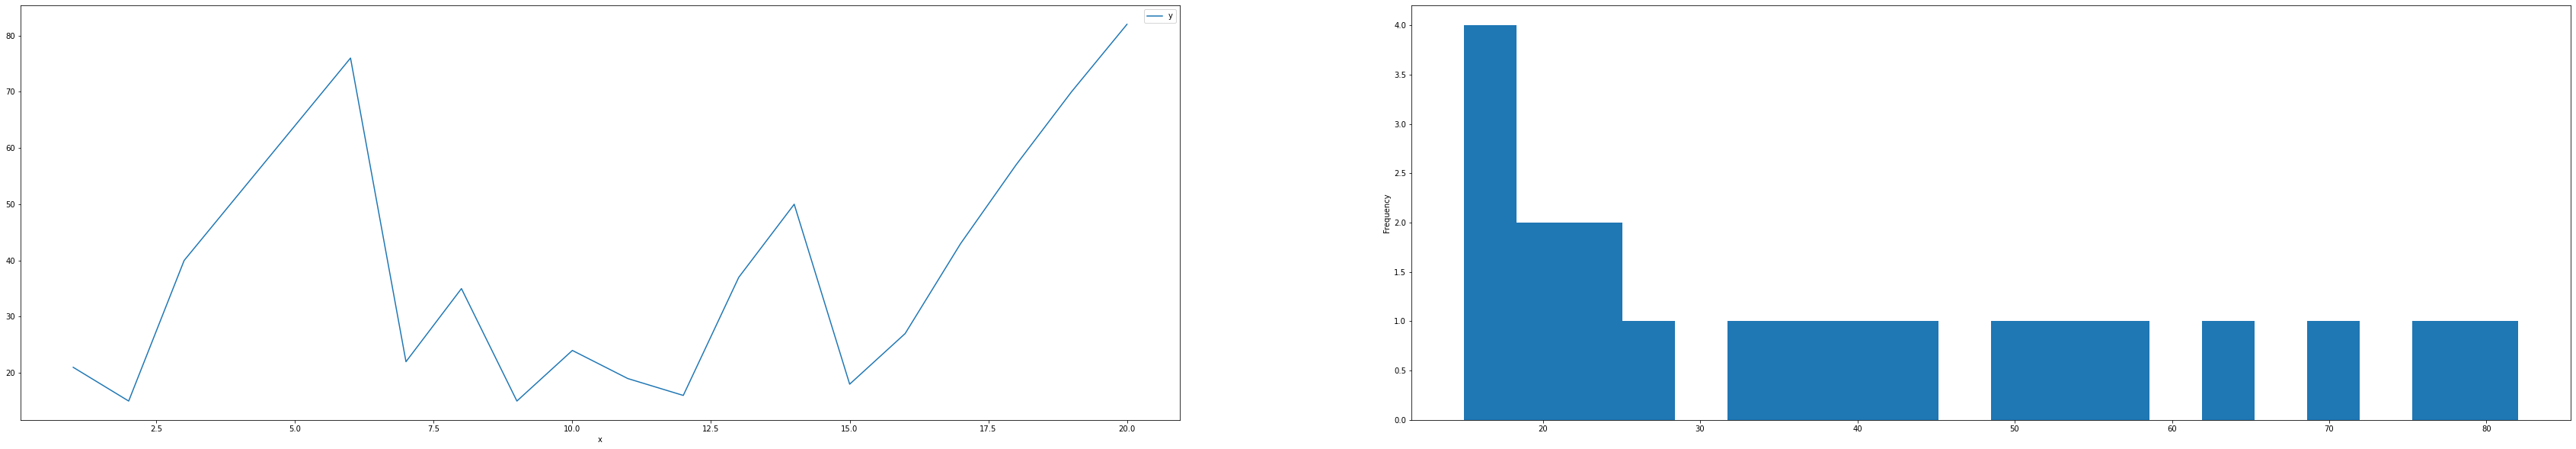

In [152]:
# Show the data and the distribution
plot_height = 10
plot_width = 60
fig, axes = plt.subplots(ncols=2, figsize=(plot_width, plot_height))
data.plot("x", "y", ax=axes[0])
sub_plot = data["y"].plot.hist(bins=20, ax=axes[1])

#### Show how a histogram can be created with numpy

The Numpy library offers a function to computing a histogram. This function will create a group of bins, in which it will place our raw data points; so the histogram we calculate is affectively representing a count of the data points found within a bin.

Note: There will always be one more edge (makred with a '|') than there are counts (marked with a $c_n$) as each ontinguous bin has two edges and the counts coresponde to a bin:

```| c1 | c1 | c3 |```


Official documentation can be found here on the coresponding [numpy.org](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) page.



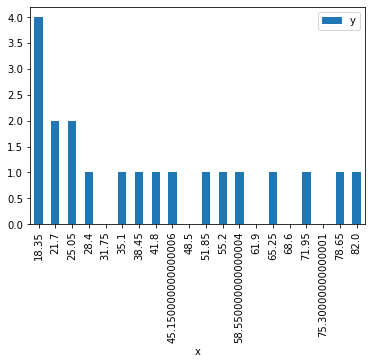

In [120]:
count, bin_edges = numpy.histogram(data["y"], bins=20)
bin_edges_to_plot = bin_edges[1:]
hist = pandas.DataFrame({"x": bin_edges_to_plot, "y": count})
axis = hist.plot.bar("x", "y")

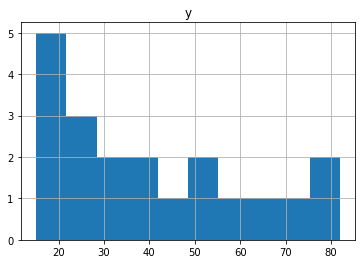

# Normalize the data

## Min-Max Scaling

In [47]:
y_min = data["y"].min()
print("min: {0}".format(y_min))
y_max = data["y"].max()
print("max: {0}".format(y_max))
min_max = data.copy()
min_max["y"] = min_max["y"].apply(lambda y: (y - y_min) / (y_max - y_min) )
min_max.head()

min: 15
max: 82


,x,y
0,1,0.089552
1,2,0.268657
2,3,0.373134
3,4,0.552239
4,5,0.731343


min: 0.0
max: 1.0
mu: 0.37388059701492543
sigma: 0.3137683835875103
median: 0.31343283582089554


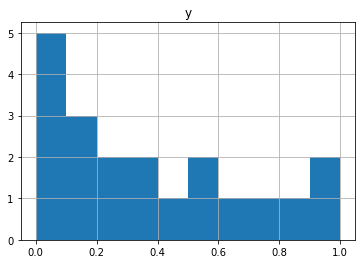

In [56]:
print("min: {0}".format(min_max["y"].min()))
print("max: {0}".format(min_max["y"].max()))
print("mu: {0}".format(min_max["y"].mean()))
print("sigma: {0}".format(min_max["y"].std()))
print("median: {0}".format(min_max["y"].median()))
axes = min_max.hist("y")

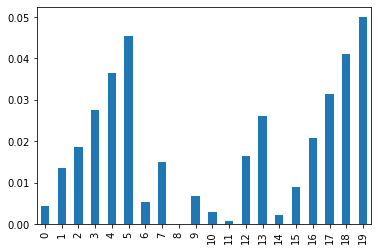

In [62]:
y_count = min_max["y"].count()
min_max["p"] = min_max["y"].apply(lambda y: y / y_count)
axes = min_max["p"].plot.bar()

## Standardization

mu: 40.05
sigma: 21.022481700363194


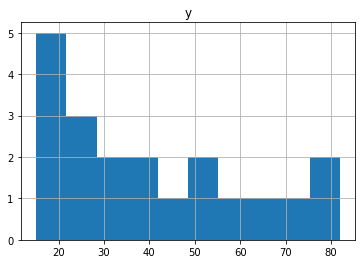

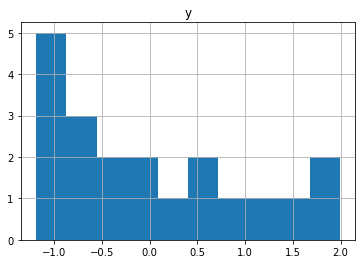

In [52]:
y_mu = data["y"].mean()
print("mu: {0}".format(y_mu))
y_sigma = data["y"].std()
print("sigma: {0}".format(y_sigma))
standard = data.copy()
standard["y"] = standard["y"].apply(lambda y: (y - y_mu) / y_sigma )
axes = data.hist("y")
axes = standard.hist("y")